# Data Cleaning and EDA od Titanic dataset from Kaggle
>https://www.kaggle.com/c/titanic/data

## Importing necessary modules

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Dictionary

survival:	Survival	 0 = No, 1 = Yes

pclass:	 Ticket          class 1 = 1st, 2 = 2nd, 3 = 3rd

sex:	Sex	

Age:	Age in years

sibsp:	# of siblings / spouses aboard the Titanic	

parch:	# of parents / children aboard the Titanic	

ticket:	Ticket number	

fare:	Passenger fare	

cabin:	Cabin number	

embarked:	Port of Embarkation	       C = Cherbourg, Q = Queenstown, S = Southampton

## Reading the data

In [2]:
df = pd.read_csv('datasets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the length of the dataset
len(df)

891

In [7]:
# Going through the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Checking for any missing values

In [8]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above cell shows that 177 values for `Age`, 2 values for `Embarked` and 687 values for `Cabin` are missing

In [12]:
df.Cabin.dtypes

dtype('O')

In [13]:
df.Age.dtypes

dtype('float64')

In [14]:
df.Embarked.dtypes

dtype('O')

## Filling out the missing values

In [19]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            #  Adding boolean column if it is missing
            df[label + "_is_missing"] = pd.isnull(content)
            # Filling the age column missing value with mean
            df[label] = df[label].fillna(content.mean())
    else:
        df[label + "_is_missing"] = pd.isnull(content)
        # Converting object into categorical and filling it
        df[label] = pd.Categorical(content).codes + 1

In [20]:
df.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Name_is_missing        0
Sex_is_missing         0
Age_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_is_missing,Sex_is_missing,Age_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,0,3,109,2,22.000000,1,0,524,7.2500,0,3,False,False,False,False,True,False
1,2,1,1,191,1,38.000000,1,0,597,71.2833,82,1,False,False,False,False,False,False
2,3,1,3,354,1,26.000000,0,0,670,7.9250,0,3,False,False,False,False,True,False
3,4,1,1,273,1,35.000000,1,0,50,53.1000,56,3,False,False,False,False,False,False
4,5,0,3,16,2,35.000000,0,0,473,8.0500,0,3,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,549,2,27.000000,0,0,102,13.0000,0,3,False,False,False,False,True,False
887,888,1,1,304,1,19.000000,0,0,15,30.0000,31,3,False,False,False,False,False,False
888,889,0,3,414,1,29.699118,1,2,676,23.4500,0,3,False,False,True,False,True,False
889,890,1,1,82,2,26.000000,0,0,9,30.0000,61,1,False,False,False,False,False,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Name                 891 non-null    int16  
 4   Sex                  891 non-null    int8   
 5   Age                  891 non-null    float64
 6   SibSp                891 non-null    int64  
 7   Parch                891 non-null    int64  
 8   Ticket               891 non-null    int16  
 9   Fare                 891 non-null    float64
 10  Cabin                891 non-null    int16  
 11  Embarked             891 non-null    int8   
 12  Name_is_missing      891 non-null    bool   
 13  Sex_is_missing       891 non-null    bool   
 14  Age_is_missing       891 non-null    bool   
 15  Ticket_is_missing    891 non-null    boo

## EDA of the dataset

C:\Users\Pravin kumar\AppData\Local\Temp\ipykernel_26940\2687342672.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette='viridis', hue = None)


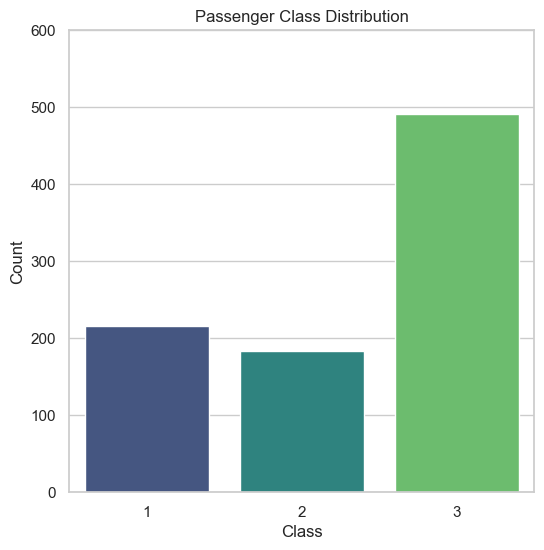

In [31]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Visualize the distribution of passengers by class
plt.figure(figsize=(6, 6))
sns.countplot(x='Pclass', data=df, palette='viridis', hue = None)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.ylim(0, 600)
plt.show()

In [35]:
df.Age.value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

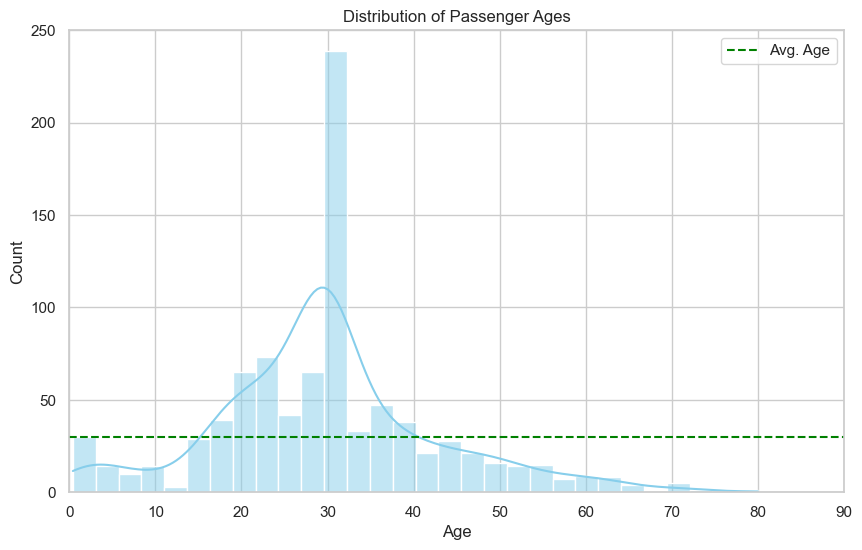

In [41]:
# Visualize the distribution of passengers by age
plt.figure(figsize=(10, 6))
sns.histplot(df.Age, kde=True, color='skyblue', bins=30)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.axhline(df.Age.mean(), linestyle = '--', color = 'green', label = 'Avg. Age')
plt.legend()
plt.xlim(0, 90)
plt.ylim(0, 250)
plt.show()

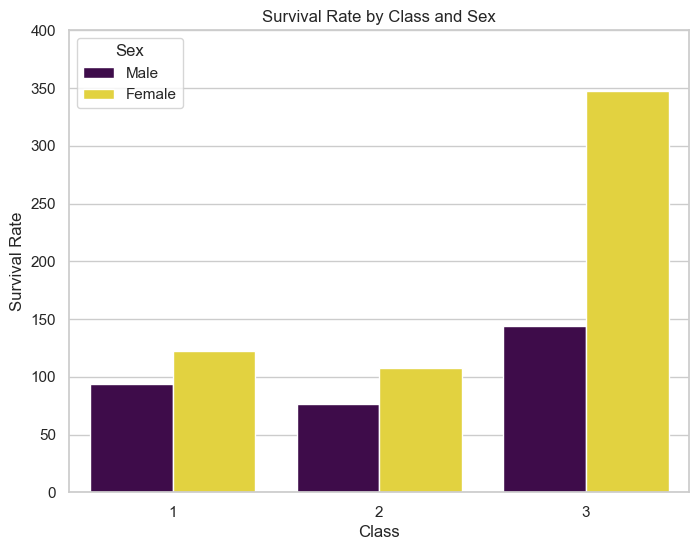

In [54]:
# Explore the survival rate by class and sex
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue = 'Sex', data=df, palette='viridis')
plt.title('Survival Rate by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.legend(['Male', 'Female'], title = 'Sex')
plt.ylim(0, 400)
plt.show()

C:\Users\Pravin kumar\AppData\Local\Temp\ipykernel_26940\2882004796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, palette='pastel')


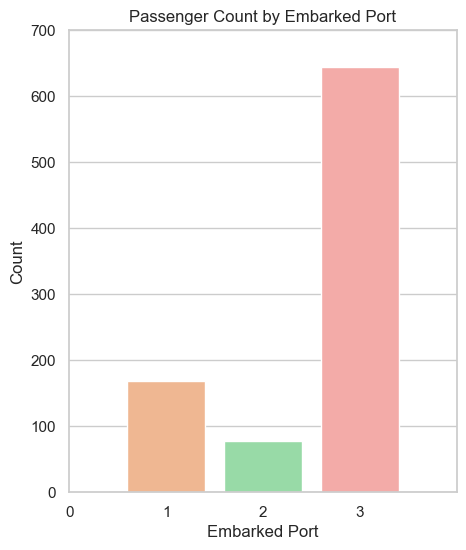

In [61]:
# Visualize the count of passengers by embarked port
plt.figure(figsize=(5, 6))
sns.countplot(x='Embarked', data=df, palette='pastel')
plt.title('Passenger Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.xlim(0, 4)
plt.ylim(0, 700)
plt.ylabel('Count')
plt.show()